In [1]:
from biasvariance import *
from helpers import *
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [2]:
init_notebook_mode(connected=True)

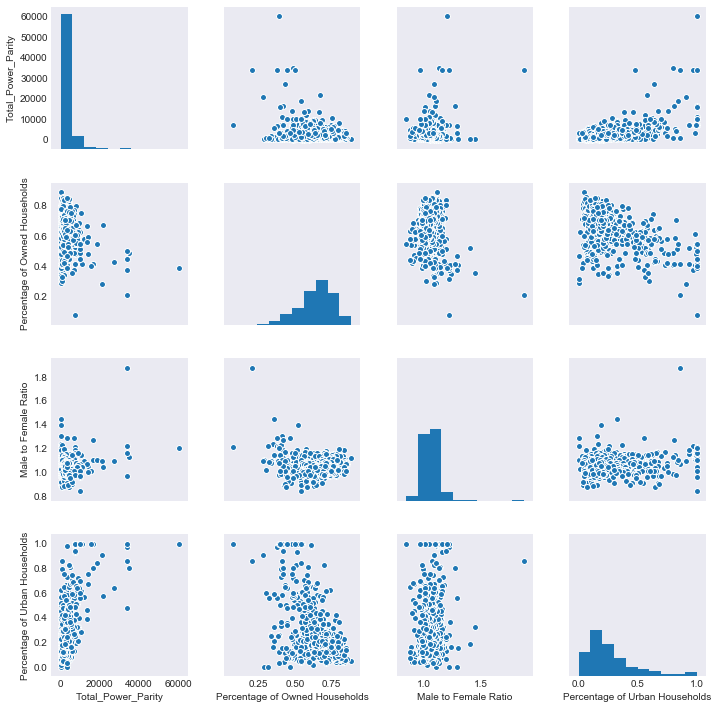

In [3]:
#create pairplot to check interactions
sns.set_style('dark')
sns.pairplot(features.iloc[:, :-4])

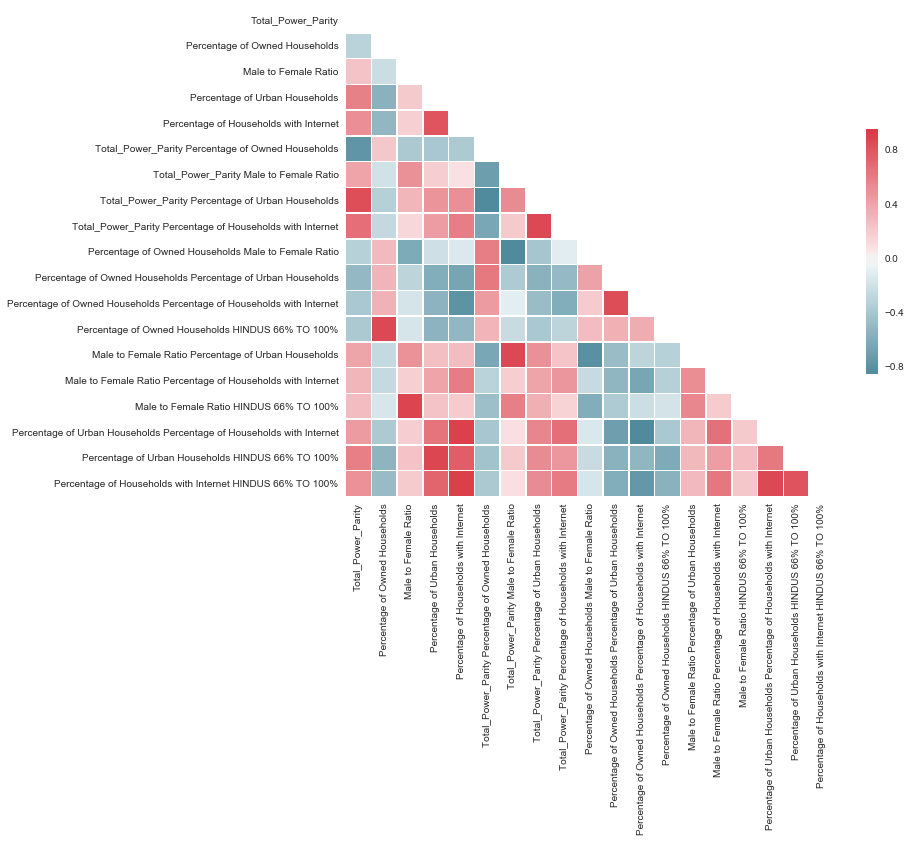

In [4]:
#Creating a heatmap to show features that are highly correlated

sns.set(style = 'white')

corr = features_selected_train.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11,9))

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.95,center=0,square=True,linewidths=0.5,cbar_kws={'shrink' : 0.5})

In [5]:
#initialize Linear Regression model 
lr = LinearRegression()

In [6]:
#Creating Linear Regression model for data post initial feature engineering
model_2 = lr.fit(features_selected_train, y_train)

In [7]:
#Calculating predicted y values
features_selected_test = features_interactions_test[features_selected_train.columns]
y_pred_2 = model_2.predict(features_selected_test)

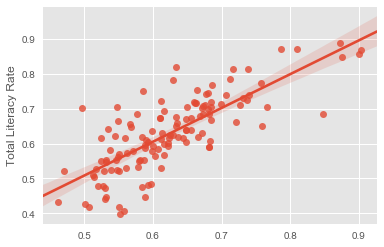

In [8]:
style.use('ggplot')
sns.regplot(y_pred_2,y_test)

In [9]:
model_2_coef = pd.DataFrame(model_2.coef_).T
model_2_coef.columns = list(features_selected_train.columns)
model_2_coef = model_2_coef.T.sort_values(by=0).T
x=list(model_2_coef.columns)

In [10]:
model_2_coef_data = [go.Bar(
            x=x,
            y=model_2_coef.iloc[0],
            marker = {'color': [random_color(coef) for coef in model_2_coef.iloc[0]]},
            
            
    )]
model_2_coef_layout = go.Layout(
    title='Feature Coefficients',
)
model_2_coef_fig = go.Figure(data=model_2_coef_data, layout=model_2_coef_layout)
iplot(model_2_coef_fig)

In [11]:
#Calculating r^2 post initial feature engingeering
r2_2 = model_2.score(features_selected_train, y_train)
ar2_2 = 1 - (1-model_2.score(features_selected_train, y_train))*(len(y_test)-1)/(len(y_test)-features_selected_test.shape[1]-1)

In [12]:
print('R2:', r2_2, 'AdjustR2:', ar2_2)
print('MSE:', mean_squared_error(y_test, y_pred_2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_2)))
print('Normalized RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_2))/ y_test.std())

R2: 0.4837338601752337 AdjustR2: 0.39290926150235805
MSE: 0.004656904430249682
RMSE: 0.06824151544514294
Normalized RMSE: 0.6278609988988433


In [13]:
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)
kfold10 = KFold(n_splits=10, shuffle=True, random_state=42)
kfold20 = KFold(n_splits=20, shuffle=True, random_state=42)

In [14]:
#Calculating cross-validation scores post initial feature engineering

cv_5_results = np.mean((cross_val_score(model_2, features_selected_train, y_train, cv=kfold5)))
cv_10_results = np.mean((cross_val_score(model_2, features_selected_train, y_train, cv=kfold10)))
cv_20_results = np.mean((cross_val_score(model_2, features_selected_train, y_train, cv=kfold20)))

In [15]:
print(cv_5_results, cv_10_results, cv_20_results)

0.3944524170616246 0.3040760403459405 0.30085221900009557
